In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.walmart.csv")
test = pd.read_csv("test.walmart.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [5]:
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
train.isnull().sum()/train.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

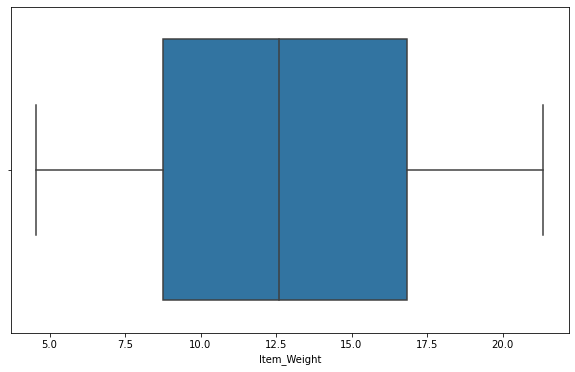

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot("Item_Weight",data = train)

Replace the null values in the "item_weight" columns of both the test and train datset with mean value

In [8]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())

In [9]:
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [10]:
print(train["Outlet_Size"].value_counts())
print(">>>>>>>>>>>>>>>>>")
print(test["Outlet_Size"].value_counts())


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
>>>>>>>>>>>>>>>>>
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


replace the null vlaues in the "Outlet_Size" column in both test and train dataset with mode value 

In [11]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])

In [12]:
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [13]:
train["Outlet_Size"].isnull().sum()

0

In [14]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
train["Item_Fat_Content"].replace(["LF","reg","low fat"],["Low Fat","Regular","Low Fat"],inplace = True)
test["Item_Fat_Content"].replace(["LF","reg","low fat"],["Low Fat","Regular","Low Fat"],inplace = True)



<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

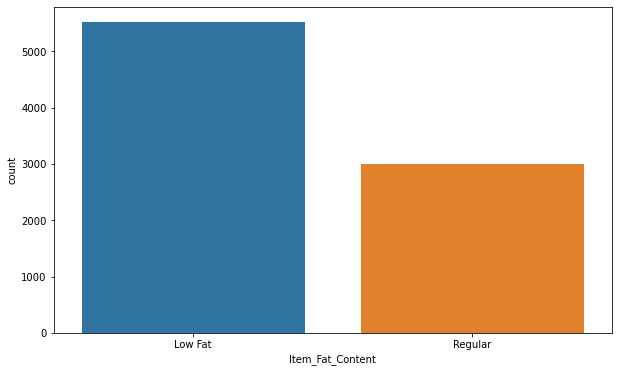

In [16]:
plt.figure(figsize = (10,6))
sns.countplot("Item_Fat_Content",data = train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

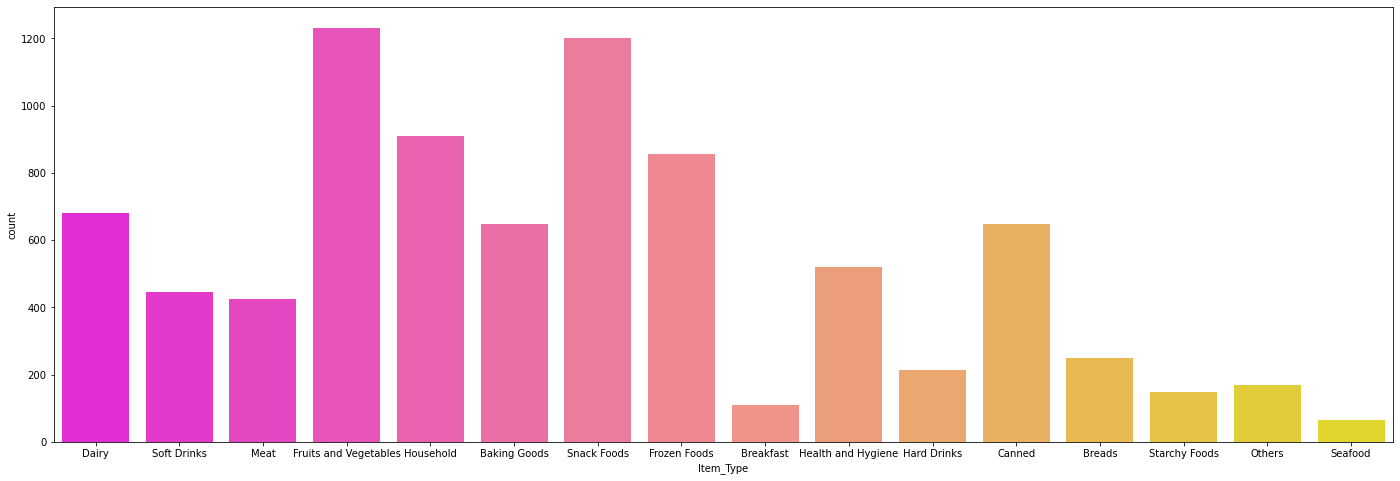

In [17]:
plt.figure(figsize = (24,8))
sns.countplot("Item_Type",data = train ,palette = "spring")

fruits and vegetables and snacks are highly sold

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

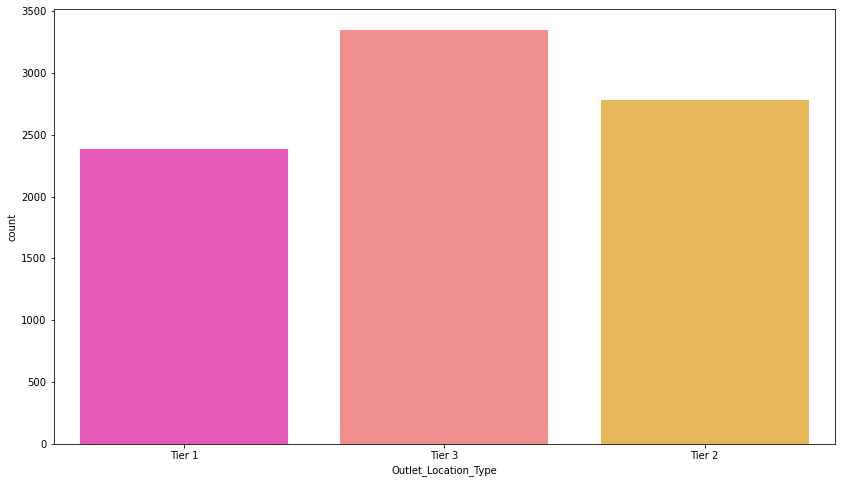

In [18]:
plt.figure(figsize = (14,8))
sns.countplot("Outlet_Location_Type",data = train ,palette = "spring")

tier 3 has more outlets

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

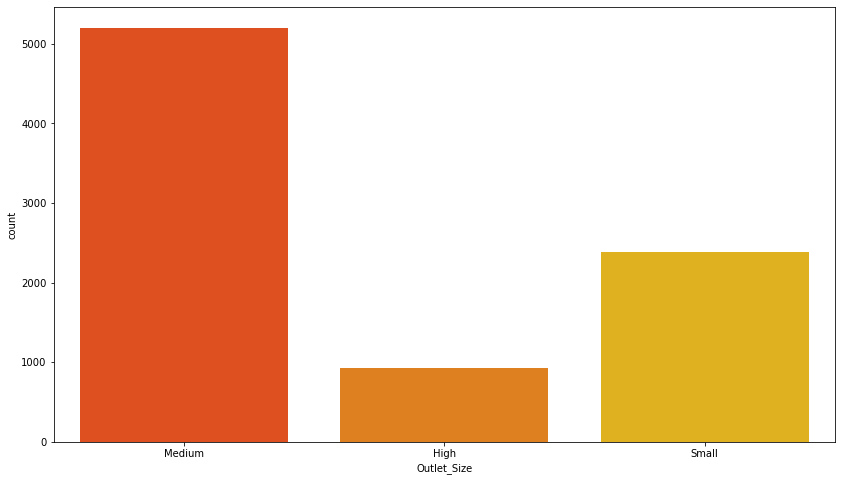

In [19]:
plt.figure(figsize = (14,8))
sns.countplot("Outlet_Size",data = train ,palette = "autumn")

medium sized outlets are more

feature engineering

In [20]:
train["outlet_years"]= 2021 - train["Outlet_Establishment_Year"]
test["outlet_years"]= 2021 - test["Outlet_Establishment_Year"]


In [21]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})



In [22]:
#Mark non-consumables as separate category in low_fat:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [23]:

#Mark non-consumables as separate category in low_fat:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [24]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [25]:

#New variable for outlet
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [26]:
train.shape, test.shape

((8523, 35), (5681, 34))

In [27]:
test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,outlet_years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,22,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,14,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,23,0,1,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,14,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,0.118599,Dairy,234.2300,OUT027,1985,36,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')


In [29]:
# Seperate Features and Target
x= train.drop(columns = ['Item_Outlet_Sales',], axis=1)
y= train['Item_Outlet_Sales']


In [30]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.1,random_state=22)

In [31]:

#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model.fit(x,y)

LinearRegression()

In [33]:
y_pred = model.predict(x)

y_preed = model.predict(test)

In [34]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)



0.563514095201381